In [10]:
from astropy.io import fits
import astropy.units as u
import numpy
import matplotlib.pyplot as plt
plt.rcParams.update({'image.origin': 'lower',
                     'image.interpolation':"nearest"})
import os
from pathlib import Path
import numpy as np
import glob

opddir = Path('/groups/douglase/webbpsf-data/CGI/OPD')


In [11]:
opd_fnames = glob.glob(str(opddir) + '/wfirst*.fits')
opd_fnames = sorted(opd_fnames)


for i, opd_fname in enumerate(opd_fnames):
    opd = fits.open(opd_fname, mode='update')
    pxscl = opd[0].header['PIXSIZE']
    pxscl_cmnt = opd[0].header.comments['PIXSIZE']
    zunit = opd[0].header['Z_UNIT']
    opd[0].header['PIXELSCL'] = pxscl
    opd.close()
    
    opdhdr = fits.getheader(opd_fname)
    new_pxscl = opdhdr['PIXELSCL']
    
    print(i, opd_fname[38:], '\n\t\t', 
          'pixelscale:\t', new_pxscl, pxscl_cmnt, '\n\t\t',
          'OPD unit:\t', zunit, '\n')
#     print('\'' + opd_fname[38:] + '\'')
    
    
    

0 wfirst_phaseb_DEFOCUSLENS1_phase_error_V1.0.fits 
		 pixelscale:	 1.012897e-05 spacing in meters 
		 OPD unit:	 meters 

1 wfirst_phaseb_DEFOCUSLENS2_phase_error_V1.0.fits 
		 pixelscale:	 1.012897e-05 spacing in meters 
		 OPD unit:	 meters 

2 wfirst_phaseb_DEFOCUSLENS3_phase_error_V1.0.fits 
		 pixelscale:	 1.012897e-05 spacing in meters 
		 OPD unit:	 meters 

3 wfirst_phaseb_DEFOCUSLENS4_phase_error_V1.0.fits 
		 pixelscale:	 1.012897e-05 spacing in meters 
		 OPD unit:	 meters 

4 wfirst_phaseb_DM1_phase_error_V1.0.fits 
		 pixelscale:	 9.260112e-05 spacing in meters 
		 OPD unit:	 meters 

5 wfirst_phaseb_DM2_phase_error_V1.0.fits 
		 pixelscale:	 9.260112e-05 spacing in meters 
		 OPD unit:	 meters 

6 wfirst_phaseb_FILTER_phase_error_V1.0.fits 
		 pixelscale:	 1.012874e-05 spacing in meters 
		 OPD unit:	 meters 

7 wfirst_phaseb_FOCM_phase_error_V1.0.fits 
		 pixelscale:	 4.231856e-05 spacing in meters 
		 OPD unit:	 meters 

8 wfirst_phaseb_FOLD1_phase_error_V1.0.fits 
		 

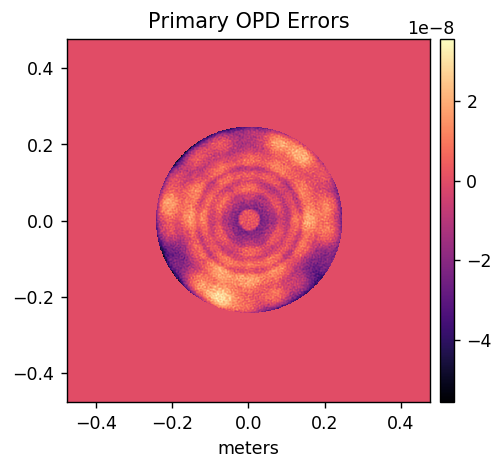

In [15]:
pri_opd = fits.open(opd_fnames[30])

import misc
misc.myimshow(pri_opd[0].data, 'Primary OPD Errors',
              pxscl=pri_opd[0].header['PIXELSCL']*u.meter/u.pix)
